In [1]:
import numpy as np
import pandas as pd

from src.M4_data import prepare_M4_data
from src.M4_experiment import plot_model_prediction, evaluate_model_prediction
from src.ESRNN import ESRNN

In [ ]:
X_train_df, y_train_df, X_test_df, y_test_df = prepare_M4_data('Quarterly', num_obs=3) #, num_obs=5
y_train_df

In [ ]:
import torch

## Weekly
# esrnn = ESRNN(max_epochs=4, batch_size=4, dilations=[[1, 4], [52]], rnn_weight_decay=0.5, freq_of_test=1)

## Quarterly
# esrnn = ESRNN(max_epochs=1, batch_size=3, rnn_weight_decay=0.5, freq_of_test=1)

## Daily
# esrnn = ESRNN(max_epochs=2, batch_size=16, learning_rate=3e-4, per_series_lr_multip=1.5,
#               gradient_eps=1e-6, level_variability_penalty=100,
#               dilations=[[1,7],[28]], add_nl_layer=True,
#               seasonality=7, input_size=7, output_size=14)

## Debugging
with torch.autograd.detect_anomaly():
    esrnn = ESRNN(max_epochs=4, max_periods=1, batch_size=3, state_hsize=4,
                  seasonality=1, input_size=3, output_size=8, dilations=[[1, 2]],
                  rnn_weight_decay=1.0, freq_of_test=1, random_seed=1, cell_type='ResLSTM')
    esrnn.fit(X_train_df, y_train_df, X_test_df, y_test_df)

In [ ]:
plot_model_prediction(y_train_df, X_test_df, y_test_df, model=esrnn, u_id='Q1')

In [ ]:
esrnn.evaluate_model_prediction(y_train_df, X_test_df, y_test_df)

In [ ]:
# M4 eval
#(0.778*(23.0/100) + 0.847*(24.0/100) + 0.836*(48.0/100) + 0.920*(5.0/100))
#(13.176*() + 9.679*() + 12.126*())
#(14.42*(23.0/(23+24+48)) + 10.09*(24.0/(23+24+48)) + 10.81*(48.0/(23+24+48)))

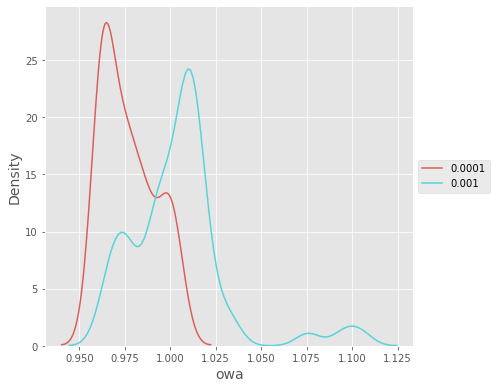

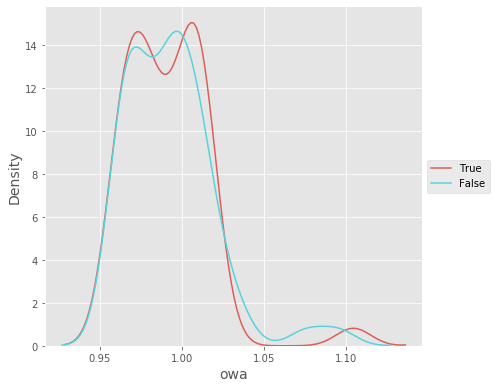

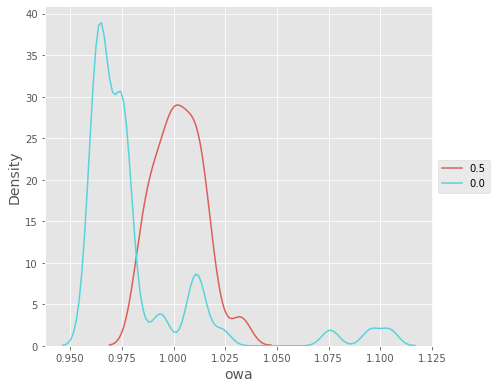

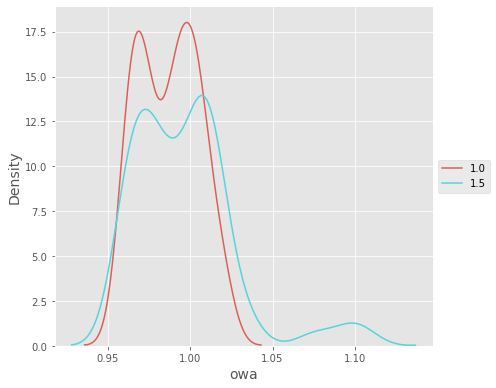

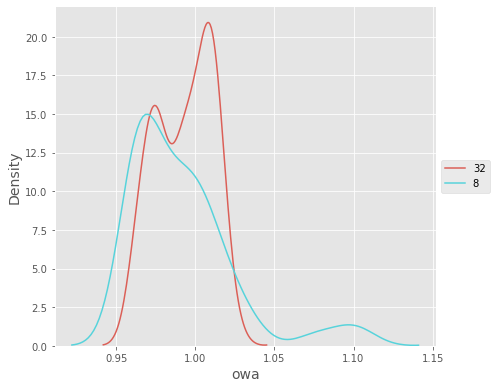

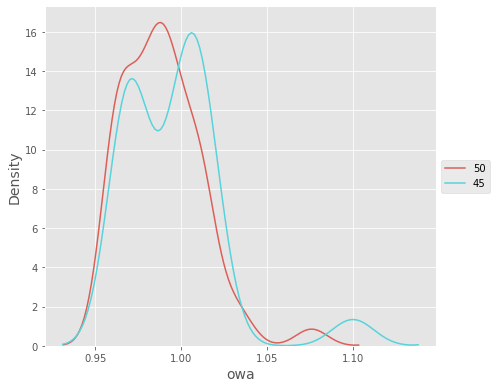

In [5]:
from src.hyperpar_tunning_m4 import parse_grid_search
from src.utils_visualization import plot_cat_distributions

gs_df = parse_grid_search('Quarterly')
plot_cat_distributions(df=gs_df, cat='learning_rate', var='owa')
plot_cat_distributions(df=gs_df, cat='add_nl_layer', var='owa')
plot_cat_distributions(df=gs_df, cat='rnn_weight_decay', var='owa')
plot_cat_distributions(df=gs_df, cat='per_series_lr_multip', var='owa')
plot_cat_distributions(df=gs_df, cat='batch_size', var='owa')
plot_cat_distributions(df=gs_df, cat='training_percentile', var='owa')